In [1]:
import glob

In [5]:
# path = 'timing_data/time_4'
# path += '/time_ah_*'
# txt_files = glob.glob(path)

# classes = [0, 1, 16, 17, 18, 2, 20, 22, 25, 27, 3, 31, 34, 4, 5, 6, 8, 89, 9]
classes = [0, 1, 2, 3, 4, 5, 6, 8, 9]


# Text files containing data After Cache Hit
txt_files_ah = []
for i in classes:
    path = 'timing_data/time_' + str(i)
    path += '/time_' + 'ah' + '_*'
    txt_files_ah += glob.glob(path)
    
# Text files containing data Before Clflush
txt_files_bclf = []
for i in classes:
    path = 'timing_data/time_' + str(i)
    path += '/time_' + 'bclf' + '_*'
    txt_files_bclf += glob.glob(path)

In [6]:
ah_values = []
ah_target = []
for filename in txt_files_ah:
    for m in range(20):
        if filename[18] == '/':
            ah_target += [int(filename[17])]
        else:
            ah_target += [int(''.join(filename[17:19]))]
    
    with open(filename) as f:
        ah_values += f.readlines()
        
        
bclf_values = []
bclf_target = []
for filename in txt_files_bclf:
    for m in range(20):
        if filename[18] == '/':
            bclf_target += [int(filename[17])]
        else:
            bclf_target += [int(''.join(filename[17:19]))]
    
    with open(filename) as f:
        bclf_values += f.readlines()

In [7]:
i = 0;
for elem in ah_values:
    ah_values[i] = int(elem)
    i += 1
    
i = 0;
for elem in bclf_values:
    bclf_values[i] = int(elem)
    i += 1

In [8]:
import pandas as pd
import numpy as np
array = np.array([[i, j, k] for i, j, k in zip(ah_values, bclf_values, bclf_target)])
index_values = [i for i in range(len(ah_values))]
column_values = ['time_ah', 'time_bclf', 'class']
df = pd.DataFrame(data=array, index=index_values, columns=column_values)

In [9]:
df

,time_ah,time_bclf,class
0,320,330,0
1,300,320,0
2,328,336,0
3,320,320,0
4,340,314,0
...,...,...,...
12795,520,320,9
12796,520,328,9
12797,504,320,9
12798,520,332,9


In [10]:
# Removing the Outliers based on the values of "time_ah"

Q1 = np.percentile(df['time_ah'], 25, method='median_unbiased')
Q3 = np.percentile(df['time_ah'], 75, method='median_unbiased')
IQR = Q3 - Q1

upper = np.where(df['time_ah'] >= (Q3 + 1.5 * IQR))[0]
lower = np.where(df['time_ah'] <= (Q3 - 1.5 * IQR))[0]

df.drop(upper, inplace=True)
df.drop(lower, inplace=True)

In [11]:
# resetting the indexes of dataframe after dropping outliers

df.reset_index(drop=True, inplace=True)

In [12]:
# Removing the Outliers based on the values of "time_bclf"

Q1 = np.percentile(df['time_bclf'], 25, method='median_unbiased')
Q3 = np.percentile(df['time_bclf'], 75, method='median_unbiased')
IQR = Q3 - Q1

upper = np.where(df['time_bclf'] >= (Q3 + 1.5 * IQR))[0]
lower = np.where(df['time_bclf'] <= (Q3 - 1.5 * IQR))[0]

df.drop(upper, inplace=True)
df.drop(lower, inplace=True)

In [13]:
len(df['time_ah'])

9792

In [14]:
df['time_bclf'].max()

720

In [15]:
feature_columns = ['time_ah', 'time_bclf']
X = df[feature_columns].values
y = df['class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [30]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_train, y_train)
y_pred = gmm.predict(X_test)

In [31]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.28534966819806024


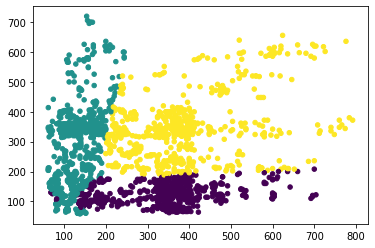

In [32]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20, cmap='viridis');

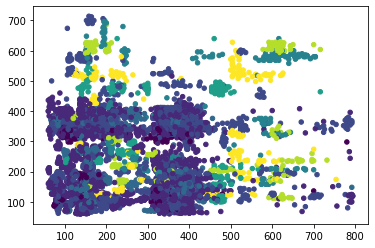

In [26]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='viridis');

## Testing the GMM clustering template

In [20]:
classes = [2, 3]

test_files_ah = []
for i in classes:
    path = 'test_for_data/uops-' + str(i)
    path += '/time_' + 'ah' + '_*'
    test_files_ah += glob.glob(path)
    
    
test_files_bclf = []
for i in classes:
    path = 'test_for_data/uops-' + str(i)
    path += '/time_' + 'bclf' + '_*'
    test_files_bclf += glob.glob(path)

In [21]:
test_files_bclf

['test_for_data/uops-2/time_bclf_13.txt',
 'test_for_data/uops-2/time_bclf_3.txt',
 'test_for_data/uops-2/time_bclf_14.txt',
 'test_for_data/uops-2/time_bclf_20.txt',
 'test_for_data/uops-2/time_bclf_19.txt',
 'test_for_data/uops-2/time_bclf_2.txt',
 'test_for_data/uops-2/time_bclf_9.txt',
 'test_for_data/uops-2/time_bclf_17.txt',
 'test_for_data/uops-2/time_bclf_15.txt',
 'test_for_data/uops-2/time_bclf_18.txt',
 'test_for_data/uops-2/time_bclf_10.txt',
 'test_for_data/uops-2/time_bclf_8.txt',
 'test_for_data/uops-2/time_bclf_12.txt',
 'test_for_data/uops-2/time_bclf_1.txt',
 'test_for_data/uops-2/time_bclf_11.txt',
 'test_for_data/uops-2/time_bclf_7.txt',
 'test_for_data/uops-2/time_bclf_4.txt',
 'test_for_data/uops-2/time_bclf_6.txt',
 'test_for_data/uops-2/time_bclf_16.txt',
 'test_for_data/uops-2/time_bclf_5.txt',
 'test_for_data/uops-3/time_bclf_13.txt',
 'test_for_data/uops-3/time_bclf_3.txt',
 'test_for_data/uops-3/time_bclf_14.txt',
 'test_for_data/uops-3/time_bclf_20.txt',
 '

In [22]:
ah_values = []
bclf_values = []
num_2 = 0
num_3 = 0

for filename in test_files_ah:
    if 'uops-3' in filename and num_2 == 0:
        num_2 = len(ah_values)
        
    with open(filename) as f:
        ah_values += [int(line.rstrip('\n')) for line in f.readlines()]
        
num_3 = len(ah_values) - num_2
        
        
for filename in test_files_bclf:            
    with open(filename) as f:
        bclf_values += [int(line.rstrip('\n')) for line in f.readlines()]

In [23]:
bclf_target = []
ah_target = []

for i in range(num_2):
    bclf_target += [2]
    ah_target += [2]

for i in range(num_3):
    bclf_target += [3]
    ah_target += [3]

In [24]:
import pandas as pd
import numpy as np
array = np.array([[i, j, k] for i, j, k in zip(ah_values, bclf_values, bclf_target)])
index_values = [i for i in range(len(ah_values))]
column_values = ['time_ah', 'time_bclf', 'class']
df = pd.DataFrame(data=array, index=index_values, columns=column_values)

In [26]:
X = df[feature_columns].values
y = df['class'].values

y_pred = gmm.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.116
